# Dataset content

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


**We will try to predict insurance costs using Linear regression.**

# Linear regression concept

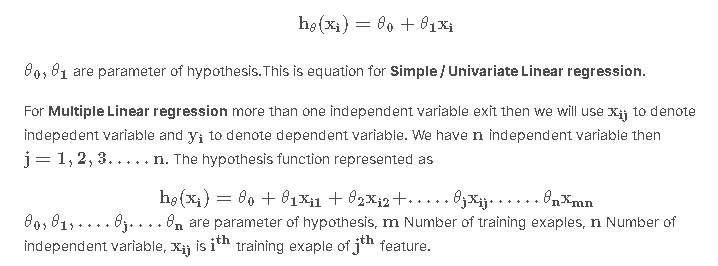

# Import libraries and dataset

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [120]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'

In [121]:
data = pd.read_csv('insurance.csv')

In [122]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
data.shape

(1338, 7)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [125]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

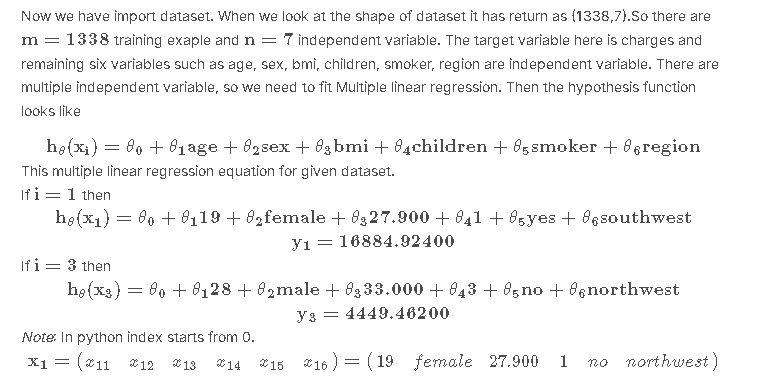

# Matrix formulation

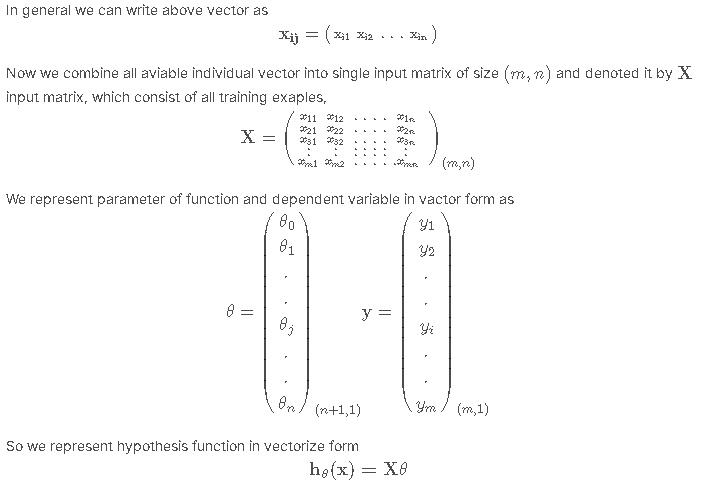

# Cost function

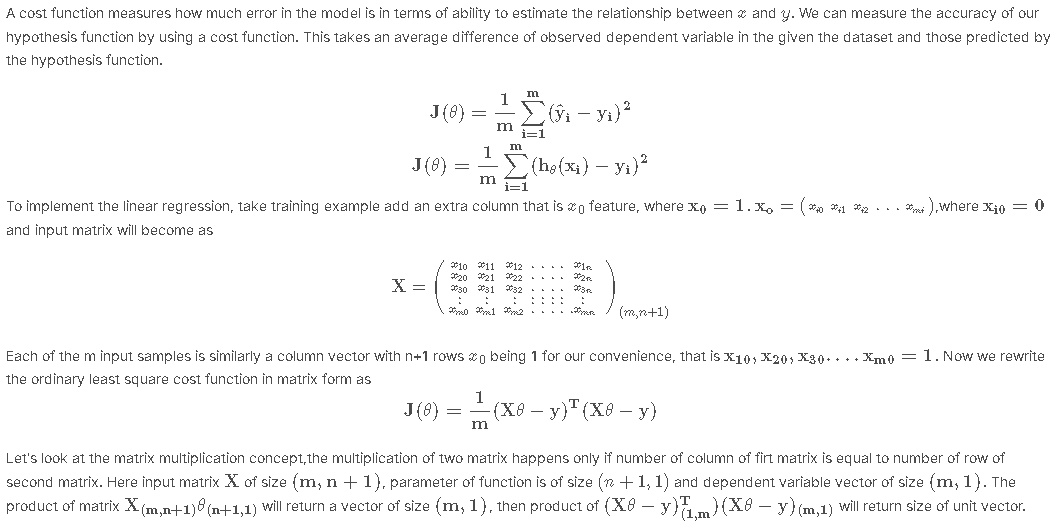

The parameters of the equation (intercept and coefficients) are found using the last equation shown in the picture below.

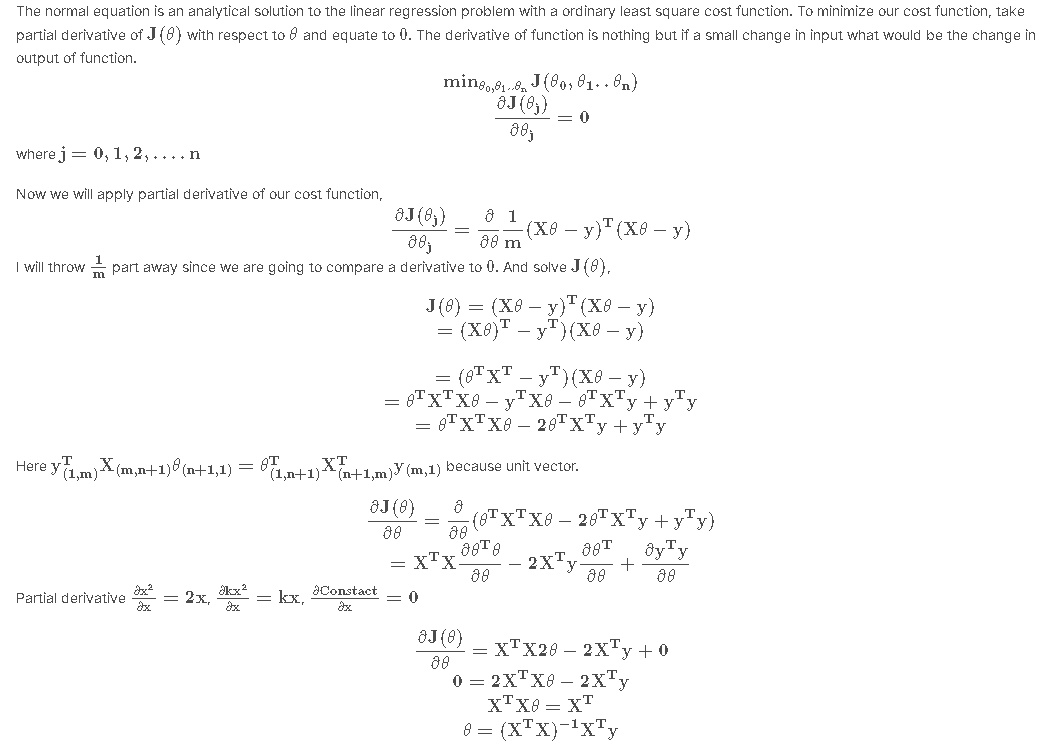

# Analysis using plots

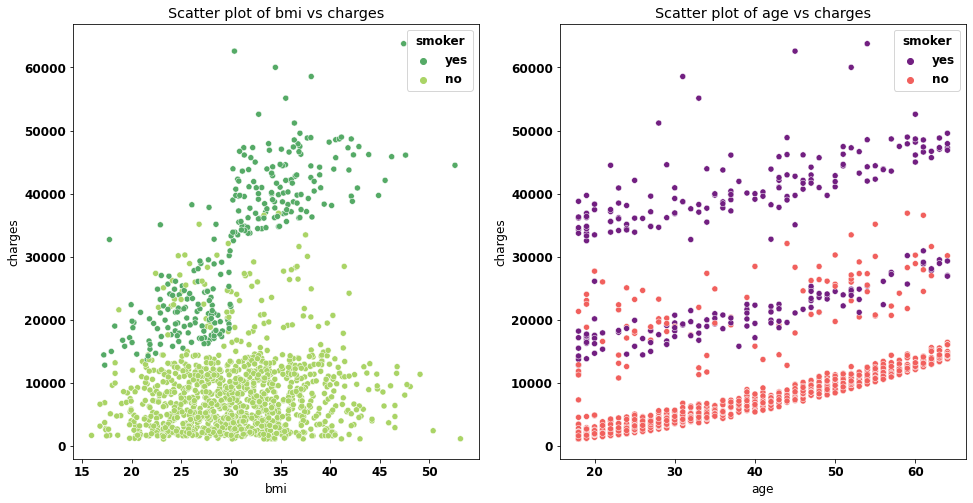

In [126]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Scatter plot of bmi vs charges')
sns.scatterplot(x='bmi',y='charges', data=data, palette='summer', hue='smoker')

plt.subplot(1,2,2)
plt.title('Scatter plot of age vs charges')
sns.scatterplot(x='age',y='charges', data=data, palette='magma', hue='smoker')

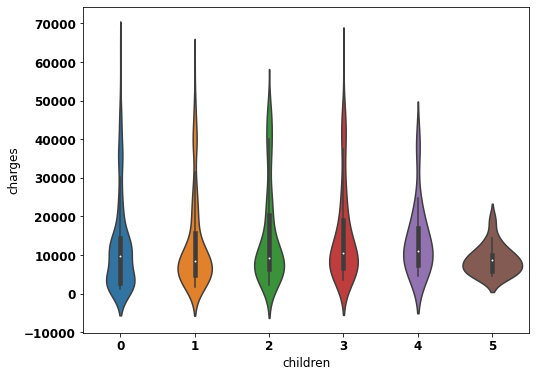

In [127]:
sns.violinplot(x='children',y='charges', data=data)

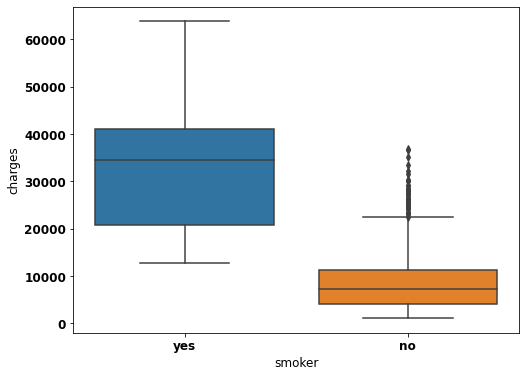

In [128]:
sns.boxplot(x='smoker',y='charges', data=data)

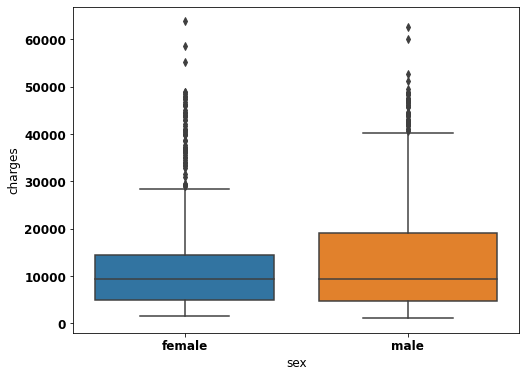

In [129]:
sns.boxplot(x='sex',y='charges', data=data)

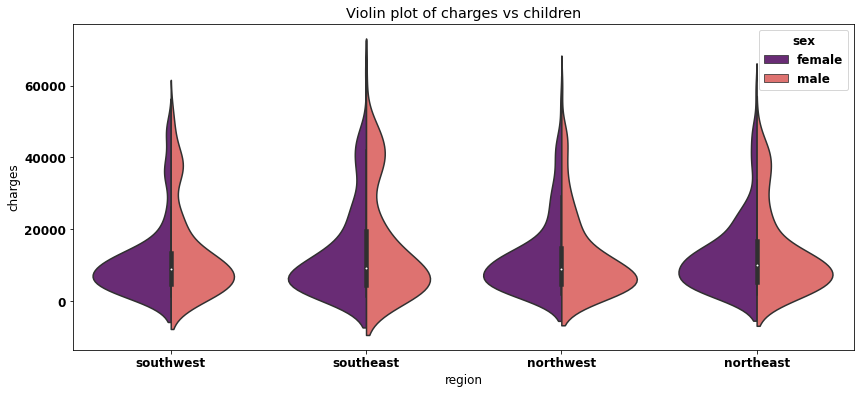

In [130]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=data,palette='magma',split=True)
plt.title('Violin plot of charges vs children');

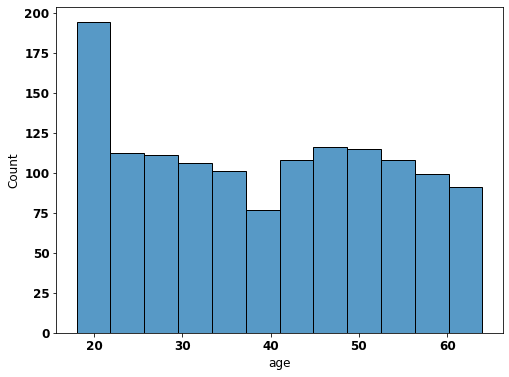

In [131]:
sns.histplot(x='age',data=data)

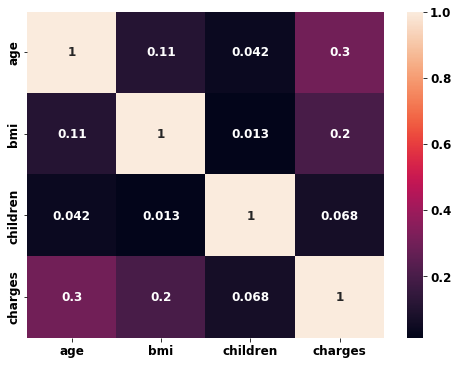

In [132]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)

**Heatmap shows there is no correlation between independent features, so there is no multicollinearity.**

## Checking distribution of features

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


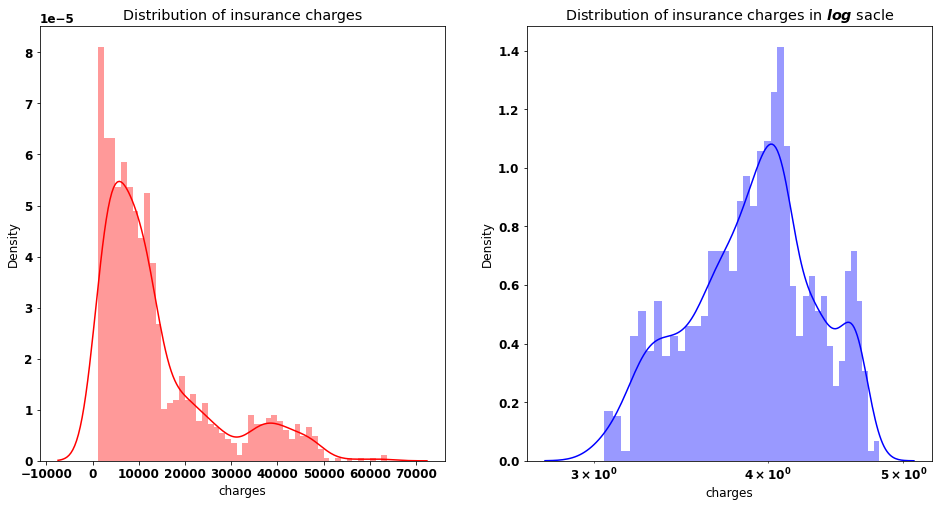

In [133]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(data['charges'],bins=50,color='r')
plt.title('Distribution of insurance charges')

plt.subplot(1,2,2)
sns.distplot(np.log10(data['charges']),bins=40,color='b')
plt.title('Distribution of insurance charges in $log$ sacle')
plt.xscale('log');

It seems from the right plot that distribution of charges data is right skewed. If we apply log on that data, we can get approximately normal distributed data.

# Data preprocessing

## One-hot encoding

In [134]:
categorical_columns = ['sex','children', 'smoker', 'region']
data_encoded = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [135]:
print('\nColumns in data frame after encoding dummy variable:\n',data_encoded.columns.values)
print('\nNumber of rows and columns in the dataset:',data_encoded.shape)


Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [136]:
data_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


## Applying log transformation on dependent variable ('charges')

In [191]:
data_encoded['charges'] = np.log(data_encoded['charges'])

In [192]:
X = data_encoded.drop('charges',axis=1) 
y = data_encoded['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Calculating VIF values

Let's calculate VIF value for age column.

In [193]:
X_age = X.drop('age',axis=1)
y_age = X['age']

In [194]:
X

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,0,0,0,0,1


In [195]:
X_train_age = np.c_[np.ones((X_age.shape[0],1)),X_age]
theta = np.matmul(np.linalg.inv(np.matmul(X_train_age.T, X_train_age)), np.matmul(X_train_age.T, y_age))

In [196]:
X_train_age

array([[ 1.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 33.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [197]:
model = LinearRegression()
model.fit(X_age,y_age)

LinearRegression()

In [198]:
parameter_df = pd.DataFrame({'theta':theta})

In [199]:
params = pd.DataFrame({'Parameters':['Intercept']+list(X_age.columns),
                       'values':[model.intercept_]+list(model.coef_),
                       'Sklearn theta': theta})
params

,Parameters,values,Sklearn theta
0,Intercept,30.956578,30.956578
1,bmi,0.277393,0.277393
2,OHE_male,-0.677831,-0.677831
3,OHE_1,1.016717,1.016717
4,OHE_2,0.924329,0.924329
5,OHE_3,3.078195,3.078195
6,OHE_4,0.203925,0.203925
7,OHE_5,-2.571356,-2.571356
8,OHE_yes,-0.859893,-0.859893
9,OHE_northwest,-0.220966,-0.220966


In [200]:
y_pred = model.predict(X_age)

In [201]:
print("Coefficient of determination (R2): %.3f" % r2_score(y_age, y_pred))

Coefficient of determination (R2): 0.020


In [202]:
VIF = 1/(1- r2_score(y_age, y_pred))
VIF

1.0206073705830934

## Veryfing VIF values

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [204]:
columns = X.columns

In [205]:
columns

Index(['age', 'bmi', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4', 'OHE_5',
       'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest'],
      dtype='object')

In [206]:
X = np.c_[np.ones((X.shape[0],1)),X]

In [207]:
def calc_vif(X, columns):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif = vif[1:]
    vif["variables"] = columns

    return(vif)

In [208]:
calc_vif(X, columns)

,VIF,variables
1,1.020607,age
2,1.108836,bmi
3,1.009334,OHE_male
4,1.187528,OHE_1
5,1.168444,OHE_2
6,1.134069,OHE_3
7,1.026210,OHE_4
8,1.025540,OHE_5
9,1.018024,OHE_yes
10,1.522301,OHE_northwest


# Model building

Scikit-learn uses $θ =(X^TX)^{-1}X^Ty$ to find coefficients and intercept values. We will apply this equation and prove the results. Firstly, we need to add extra column (with $x_{i0}=1$) to the X matrix.

In [209]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [210]:
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

In [211]:
parameter_df = pd.DataFrame({'theta':theta})

In [212]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [213]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 0.00388403  0.00146283 -0.00638089  0.01491159  0.03090744  0.02860514
  0.05680978  0.05006275  0.16393066 -0.00546277 -0.01636145 -0.01690546]


In [214]:
print("Intercept: \n", model.intercept_)

Intercept: 
 1.9711772176839597


In [216]:
params = pd.DataFrame({'Parameters':['Intercept']+list(columns),
                       'values':[model.intercept_]+list(model.coef_),
                       'Sklearn theta': theta})
params

,Parameters,values,Sklearn theta
0,Intercept,1.971177,1.971177
1,age,0.003884,0.003884
2,bmi,0.001463,0.001463
3,OHE_male,-0.006381,-0.006381
4,OHE_1,0.014912,0.014912
5,OHE_2,0.030907,0.030907
6,OHE_3,0.028605,0.028605
7,OHE_4,0.056810,0.056810
8,OHE_5,0.050063,0.050063
9,OHE_yes,0.163931,0.163931


# Model evaluation

In [217]:
X_train.shape

(1070, 12)

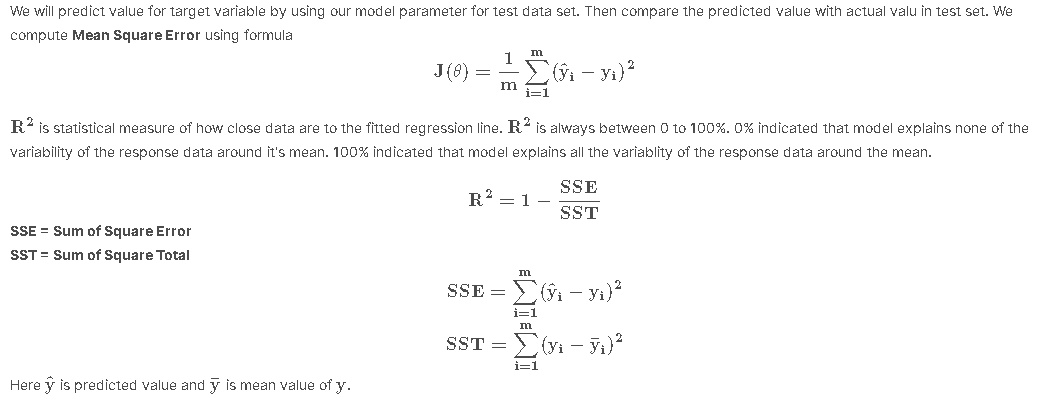

In [218]:
y_pred = model.predict(X_test)

Let's calculate MSE and R2 manually.

In [219]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0022637230232976074
R square obtain for normal equation method is : 0.7954823388873015


In [220]:
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.3f" % r2_score(y_test, y_pred))
# Adjusted R2
a = r2_score(y_test, y_pred)
print("Adjusted R2: ", round(1-(1-a)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3))
F = ((sst-sse)/(len(theta)-1))/(sst/(X_test.shape[0]-len(theta)))
print('F-statistic: ', F)

Mean squared error: 0.002
Coefficient of determination (R2): 0.795
Adjusted R2:  0.786
F-statistic:  16.903999701355154


Our F is large number, so our fit is good.

In [221]:
r2_score(y_test, y_pred)

0.7954823388873102

# Model validation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


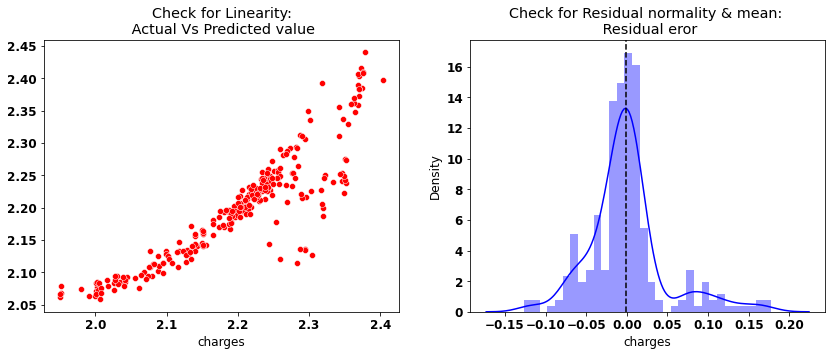

In [222]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred, ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

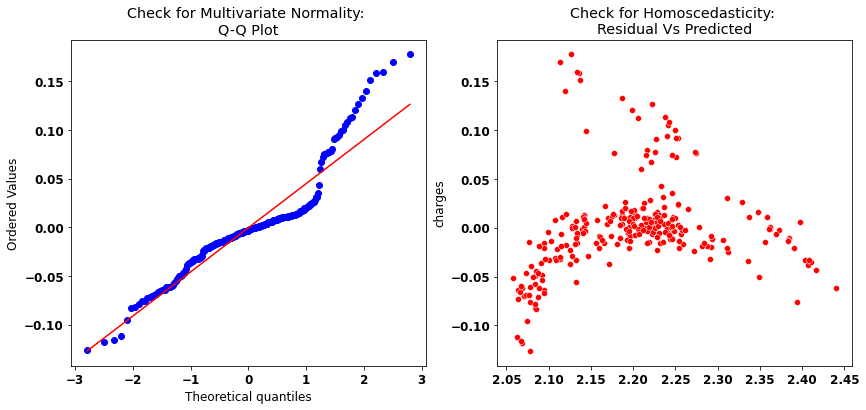

In [223]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [224]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_pred))
VIF

4.889553276521177

# Conclusions

The model assumption linear regression as follows:

1. In our model the actual vs predicted plot is curve so linear assumption fails
2. The residual mean is zero and residual error plot right skewed
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot is exhibit heteroscedastic, error will insease after certian point.
5. Variance inflation factor value is less than 5, so no multicollearity.